In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('words')
import re
from bs4 import BeautifulSoup
import re

[nltk_data] Downloading package words to
[nltk_data]     /Users/devanshugupta/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
# Accessing data file: ./data/fileName

youtube_dataset = pd.read_csv('./data/youtube_dislike_dataset_full_comments.csv', index_col = False)

In [3]:
youtube_dataset = youtube_dataset.drop(['Unnamed: 0'], axis = 1)

In [4]:
youtube_dataset

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,...,comment_11,comment_12,comment_13,comment_14,comment_15,comment_16,comment_17,comment_18,comment_19,comment_20
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,...,The amount of opportunities he creates is ridi...,He was beast at dortmund hope in United he wil...,This was a nice tribute by the Bundesliga to S...,I'm dying for him to rediscover this form for ...,here after his first Man United goal. What a p...,Thank you for your service to Dortmund Jaden S...,He is forever a joy to watch. I wish you all t...,Saw him play for England the other day for fir...,"His arrival excites me, fans of Borussia Dortm...",Shockingly calm and collective in the box\nFan...
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,...,"20,30 and 40 years from now, this gonna be one...",Words can't describe how tragic his death is o...,"I'm 43 years old, and I've enjoyed the evoluti...",The way Migos flow on this track is just incre...,All 3 Changed the Game of Rap \nThere Will nev...,"Migos was so fresh, so fly. Undoubtedly, one ...","Out of Migos entire catalog, this is sincerely...","I have heard several Migos songs, I LISTENED t...",This is exactly why Migos need to be appreciat...,Wow!!! This is hip hop. I am from the East Coa...
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,...,"For those who may not know, Hannah Waddinghamâ...","For years she was theatres best kept secret, n...",The chemistry they have on and off screen make...,"Her blonde hair, hair do, skin tone, toned arm...",You can tell how grateful she is and how happy...,I feel like she really didnâ€™t expect this an...,Her acceptance speech is what put me over the ...,This is the kind of speech we love. genuine fu...,Best speech of the night! Hannah seems like su...,I nearly cried when I saw Jason's face. so muc...
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,...,ç§ã¯ãƒ‡ãƒ“ãƒ¥ãƒ¼ã—ã¦ã‹ã‚‰JO1ã‚’çŸ¥ã£ãŸã...,ãƒ¡ãƒ³ãƒãƒ¼ãŒè‚©ã®åŠ›ã‚’æŠœã„ã¦éŽåŽ»æ›²ã...,ã»ã‚“ã¨ã«ã€ã€ã€è“®ãã‚“ã€ã€\nã©ã“ã...,çš†ã•ã‚“ã®ã‚³ãƒ¡ãƒ³ãƒˆèª­ã‚“ã§ã¾ãŸæ¶™ãŒå...,ã‚„ã£ã±Youngã£ã¦ç¥žæ›²ã ã€ã€ã€ã€‚,YOUNGã®è“®ãã‚“ã‚‚ã‚‚ã®ã™ã”ãè‰¯ãã¦å®...,ãªã‚“ã§æœ¨å…¨æ­Œã†æ™‚ãƒãƒ¼ã‚«ãƒ¼ãƒ•ã‚§ã‚¤ã...,è“®ãã‚“ã€1O1ã®ã¨ãyoungè¸Šã£ã¦ãŸã®ã‚...,I never worry about life lifeã®ã¨ã“ã‚ã®è“...,ãƒ•ã‚¡ã‚¤ãƒŠãƒ«ã®2æ›²ã‚’ã“ã®åˆ¶æœã§ãƒ‘ãƒ•...
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,...,The soil-shear failure mode is really impressi...,Thanks to videos like these I massively overde...,I only ever did the calculations for one retai...,"Years ago as a baby apprentice electrician, I ...",I was on my HOA board for two (terrible) years...,You're single-handedly saving my interest in m...,I live right near the NJ project. It was wild ...,Super fascinating Grady! I'm wondering if you ...,"As a new geologist at a geotech firm, Iâ€™m le...","I also learned that in Japan, retaining walls ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33113,zzEblS1lEvU,Highlights: Leeds United 1-0 Burnley | Bamford...,UCyQcJHDN4uYfPa1DHzKVSnw,Leeds United Official,2020-12-27 22:00:19,182440,2681,73,217,Leeds United LUFC LUTV marcelo bielsa highlights,...,I never expected COD to be able to do somethin...,To all those saying how activision had to bend...,The First S

In [5]:
cols = youtube_dataset.columns

In [6]:
len(youtube_dataset)

33118

In [7]:
words = set(nltk.corpus.words.words())

len(words)

235892

# Data Cleaning


## Pre-processing

### Removing non-english words


### Converting review text to lowercase


In [5]:
youtube_dataset.iloc[:,13:] = youtube_dataset.iloc[:,13:].apply(lambda x: x.str.lower())

### Removing links

In [9]:
#removing all the URL links from the comment text. 
#For this purpose, we are removing all the words in the comment text which begin with http

youtube_dataset.iloc[:,13:] = youtube_dataset.iloc[:,13:].apply(lambda comment: re.sub(r"http\S+", "", str(comment)))


### Removing spaces

In [10]:
#removing all the spaces from the comment body using the strip method.


youtube_dataset.iloc[:,13:] = youtube_dataset.iloc[:,13:].apply(lambda x: x.str.strip())

### remove the stop words 

In [10]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/devanshugupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
#In the stopwords removal step, we are splitting the comment into words. Then, we are filtering out stopwords and 
# then we are joining the rest of the words

from nltk.corpus import stopwords
 
for i in range(20):
    youtube_dataset.loc[:,"comment_{}".format(i+1)] = youtube_dataset.loc[:,"comment_{}".format(i+1)].apply(lambda x : " ".join([word for word in x.split() if word not in stopwords.words('english')]))
    print("finished",i)



finished 0
finished 1
finished 2
finished 3
finished 4
finished 5
finished 6
finished 7
finished 8
finished 9
finished 10
finished 11
finished 12
finished 13
finished 14
finished 15
finished 16
finished 17
finished 18
finished 19


In [11]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/devanshugupta/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [13]:
vader_sentiment_scores = []

In [14]:
for row in range(len(youtube_dataset)):
    sentiments = []
    for i in range(20):
        sentiments.append(sid.polarity_scores(youtube_dataset.iloc[row,i + 13])["compound"])
    vader_sentiment_scores.append(sentiments)

In [15]:
vader_sentiment_scores_df = pd.DataFrame(vader_sentiment_scores, columns = range(1,21))

In [16]:
vader_sentiment_scores_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.7891,-0.3834,0.8593,0.9163,0.9514,0.9739,0.608,0.9215,0.9181,0.9623,0.9624,0.9856,0.8885,0.7717,0.8594,0.7823,0.9602,0.9622,0.9832,0.9537
1,0.7891,-0.3834,0.8593,0.9163,0.9514,0.9739,0.608,0.9215,0.9181,0.9623,0.9624,0.9856,0.8885,0.7717,0.8594,0.7823,0.9602,0.9622,0.9832,0.9537
2,0.7891,-0.3834,0.8593,0.9163,0.9514,0.9739,0.608,0.9215,0.9181,0.9623,0.9624,0.9856,0.8885,0.7717,0.8594,0.7823,0.9602,0.9622,0.9832,0.9537
3,0.7891,-0.3834,0.8593,0.9163,0.9514,0.9739,0.608,0.9215,0.9181,0.9623,0.9624,0.9856,0.8885,0.7717,0.8594,0.7823,0.9602,0.9622,0.9832,0.9537
4,0.7891,-0.3834,0.8593,0.9163,0.9514,0.9739,0.608,0.9215,0.9181,0.9623,0.9624,0.9856,0.8885,0.7717,0.8594,0.7823,0.9602,0.9622,0.9832,0.9537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33113,0.7891,-0.3834,0.8593,0.9163,0.9514,0.9739,0.608,0.9215,0.9181,0.9623,0.9624,0.9856,0.8885,0.7717,0.8594,0.7823,0.9602,0.9622,0.9832,0.9537
33114,0.7891,-0.3834,0.8593,0.9163,0.9514,0.9739,0.608,0.9215,0.9181,0.9623,0.9624,0.9856,0.8885,0.7717,0.8594,0.7823,0.9602,0.9622,0.9832,0.9537
33115,0.7891,-0.3834,0.8593,0.9163,0.9514,0.9739,0.608,0.9215,0.9181,0.9623,0.9624,0.9856,0.8885,0.7717,0.8594,0.7823,0.9602,0.9622,0.9832,0.9537
33116,0.7891,-0.3834,0.8593,0.9163,0.9514,0.9739,0.608,0.9215,0.9181,0.9623,0.9624,0.9856,0.8885,0.7717,0.8594,0.7823,0.9602,0.9622,0.9832,0.9537


In [17]:
values_of_interest = youtube_dataset[['view_count','likes', 'comment_count']]

In [18]:
vader_sentiment_scores_df = pd.merge(values_of_interest, vader_sentiment_scores_df, left_index=True, right_index=True)

In [19]:
vader_sentiment_scores_df

,view_count,likes,comment_count,1,2,3,4,5,6,7,...,11,12,13,14,15,16,17,18,19,20
0,1048888,19515,1319,0.7891,-0.3834,0.8593,0.9163,0.9514,0.9739,0.608,...,0.9624,0.9856,0.8885,0.7717,0.8594,0.7823,0.9602,0.9622,0.9832,0.9537
1,15352638,359277,18729,0.7891,-0.3834,0.8593,0.9163,0.9514,0.9739,0.608,...,0.9624,0.9856,0.8885,0.7717,0.8594,0.7823,0.9602,0.9622,0.9832,0.9537
2,925281,11212,831,0.7891,-0.3834,0.8593,0.9163,0.9514,0.9739,0.608,...,0.9624,0.9856,0.8885,0.7717,0.8594,0.7823,0.9602,0.9622,0.9832,0.9537
3,2641597,39131,3745,0.7891,-0.3834,0.8593,0.9163,0.9514,0.9739,0.608,...,0.9624,0.9856,0.8885,0.7717,0.8594,0.7823,0.9602,0.9622,0.9832,0.9537
4,715724,32887,1067,0.7891,-0.3834,0.8593,0.9163,0.9514,0.9739,0.608,...,0.9624,0.9856,0.8885,0.7717,0.8594,0.7823,0.9602,0.9622,0.9832,0.9537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33113,182440,2681,217,0.7891,-0.3834,0.8593,0.9163,0.9514,0.9739,0.608,...,0.9624,0.9856,0.8885,0.7717,0.8594,0.7823,0.9602,0.9622,0.9832,0.9537
33114,1523729,70375,2166,0.7891,-0.3834,0.8593,0.9163,0.9514,0.9739,0.608,...,0.9624,0.9856,0.8885,0.7717,0.8594,0.7823,0.9602,0.9622,0.9832,0.9537
33115,120408275,2180780,81360,0.7891,-0.3834,0.8593,0.9163,0.9514,0.9739,0.608,...,0.9624,0.9856,0.8885,0.7717,0.8594,0.7823,0.9602,0.9622,0.9832,0.9537
33116,13346678,720854,90616,0.7891,-0.3834,0.8593,0.9163,0.9514,0.9739,0.608,...,0.9624,0.9856,0.8885,0.7717,0.8594,0.7823,0.9602,0.9622,0.9832,0.9537


In [20]:
#Splitting the train and test data in 80-20 ratio

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(vader_sentiment_scores_df, youtube_dataset['dislikes'], test_size = 0.2, train_size = 0.8)

# ML

In [21]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)


y_pred_reg = reg.predict(x_test)

In [97]:
from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState(1)

# Fit regression model
regr = DecisionTreeRegressor(max_depth=10)
regr.fit(x_train, y_train)
# Predict


y_pred_DT = regr.predict(x_test)

In [22]:
from sklearn.svm import SVR

rng = np.random.RandomState(1)

svr = SVR().fit(x_train, y_train)

# Predict
y_pred_SVR = svr.predict(x_test)

In [23]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=10)
rfr.fit(x_train, y_train)
y_pred_RFR = rfr.predict(x_test)

## MAE

In [26]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_pred_reg))


4129.918261811181


In [49]:
print(mean_absolute_error(y_test, y_pred_DT))

4197.704477764625


In [27]:
print(mean_absolute_error(y_test, y_pred_SVR))

4439.066248390475


In [28]:
print(mean_absolute_error(y_test, y_pred_RFR))

2734.109596218571


In [98]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_pred_reg))


print(mean_absolute_error(y_test, y_pred_DT))

print(mean_absolute_error(y_test, y_pred_SVR))

print(mean_absolute_error(y_test, y_pred_RFR))

4012.7544419463343
2784.219463585993
4150.955954890391
2424.029768849232


In [30]:
from xgboost import XGBRegressor

xbg_reg = XGBRegressor(max_depth = 3).fit(x_train, y_train)
y_pred_XGB = xbg_reg.predict(x_test)
mean_absolute_error(y_test, y_pred_XGB)

2877.6772656371627

In [31]:
print(mean_absolute_error(y_test, y_pred_RFR))

2734.109596218571


In [33]:
absolute_diff = abs(y_pred_RFR - y_test)

In [34]:
absolute_diff

14065    7819.064830
9280     3079.436417
6270       83.970116
6849     1631.103185
16894     530.121743
            ...     
33029     166.235139
178       301.201475
15809     146.641244
3895     3453.578664
7357     1959.313932
Name: dislikes, Length: 6624, dtype: float64

In [38]:
type(x_test['view_count'])

pandas.core.series.Series

/Users/devanshugupta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


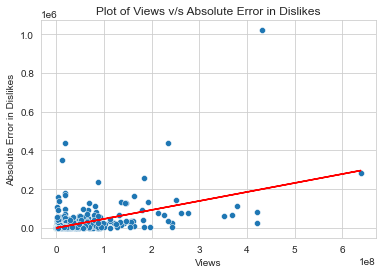

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set_style("whitegrid");


sns.scatterplot(x_test['view_count'], absolute_diff)

m, b = np.polyfit(x_test['view_count'], absolute_diff, 1)
plt.plot(x_test['view_count'], m*x_test['view_count']+b, color='red')
plt.xlabel("Views")
plt.ylabel("Absolute Error in Dislikes")
plt.title("Plot of Views v/s Absolute Error in Dislikes")
plt.show()


In [58]:
from sklearn.metrics import mean_absolute_error
import numpy as np

errors = []
ys = []
for i in range (np.min(x_test['view_count'])+1,np.max(x_test['view_count']),100000):
    ys.append(i)
    selected_y_test = y_test[x_test['view_count']<i]
    selected_x_test = x_test[x_test['view_count']<i]
    
    # Predicting the Test set results
    y_pred = rfr.predict(x_test)
    np.set_printoptions(precision=2)
    errors.append(mean_absolute_error(selected_y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [1, 6624]

In [60]:
y_pred

array([ 4923.94,  1205.56, 21190.97, ...,  3131.36, 13615.58,  4154.69])